In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import scipy.stats as st
import numpy as np
import math
from sklearn import linear_model

# ダミー変数を使ってみる

In [72]:
df = pd.read_csv("http://mcobaya.web.fc2.com/wage1.csv")

In [32]:
df.head(5)

,age,exp,sal,bon,educ,eduy
0,18.2,1.2,185.1,50.7,jhi,9
1,22.8,2.6,241.4,188.6,jhi,9
2,27.8,4.9,268.2,308.0,jhi,9
3,32.5,6.2,300.2,475.5,jhi,9
4,37.5,9.3,314.2,443.2,jhi,9


In [33]:
df['educ'].unique()

array(['jhi', 'hig', 'jcol', 'univ'], dtype=object)

## "16：大学・大学院","14：高専・短大","12：高校"," 9：中学"で調整する

In [34]:
df.loc[df['educ'] == 'jhi', ['educ']] = 9
df.loc[df['educ'] == 'hig', ['educ']] = 12
df.loc[df['educ'] == 'jcol', ['educ']] = 14
df.loc[df['educ'] == 'univ', ['educ']] = 16

In [67]:
df.head(5)

,age,exp,sal,bon,educ,eduy
0,18.2,1.2,185.1,50.7,0,9
1,22.8,2.6,241.4,188.6,0,9
2,27.8,4.9,268.2,308.0,0,9
3,32.5,6.2,300.2,475.5,0,9
4,37.5,9.3,314.2,443.2,0,9


### Interceptが初任給でcoefficientが昇給額となる

In [73]:
df_jhi = df[df['eduy'] == 9]
model_jhi = linear_model.LinearRegression()
model_jhi = model.fit(df_jhi[['exp']], df_jhi[['sal']])
print('Coefficient:', str(model_jhi.coef_))
print('Intercept:', str(model_jhi.intercept_))

Coefficient: [[6.55390351]]
Intercept: [230.22643374]


In [74]:
df_hig = df[df['eduy'] == 12]
model_hig = linear_model.LinearRegression()
model_hig = model.fit(df_hig[['exp']], df_hig[['sal']])
print('Coefficient:', str(model_hig.coef_))
print('Intercept:', str(model_hig.intercept_))

Coefficient: [[8.92915103]]
Intercept: [211.44101155]


In [75]:
df_jcol = df[df['eduy'] == 14]
model_jcol = linear_model.LinearRegression()
model_jcol = model.fit(df_jcol[['exp']], df_jcol[['sal']])
print('Coefficient:', str(model_jcol.coef_))
print('Intercept:', str(model_jcol.intercept_))

Coefficient: [[10.35113563]]
Intercept: [217.67358849]


In [76]:
df_univ = df[df['eduy'] == 16]
model_univ = linear_model.LinearRegression()
model_univ = model.fit(df_univ[['exp']], df_univ[['sal']])
print('Coefficient:', str(model_univ.coef_))
print('Intercept:', str(model_univ.intercept_))

Coefficient: [[13.64607582]]
Intercept: [257.26962822]


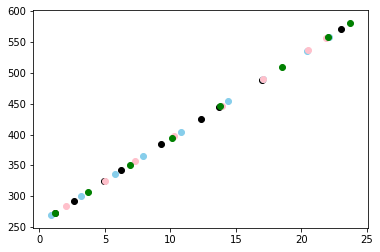

In [61]:
plt.scatter(df_jhi[['exp']], model_jhi.predict(df_jhi[['exp']]), linestyle="solid", color='black',)
plt.scatter(df_hig[['exp']], model_hig.predict(df_hig[['exp']]), linestyle="solid", color='skyblue',)
plt.scatter(df_jcol[['exp']], model_jcol.predict(df_jcol[['exp']]), linestyle="solid", color='pink',)
plt.scatter(df_univ[['exp']], model_univ.predict(df_univ[['exp']]), linestyle="solid", color='green',)
plt.show()

## 大卒と非大卒で分けて重解析

In [63]:
df = pd.read_csv("http://mcobaya.web.fc2.com/wage1.csv")
df.loc[df['educ'] == 'jhi', ['educ']] = 0
df.loc[df['educ'] == 'hig', ['educ']] = 0
df.loc[df['educ'] == 'jcol', ['educ']] = 0
df.loc[df['educ'] == 'univ', ['educ']] = 1

In [64]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [66]:
df_train = df.loc[:,['age', 'exp', 'bon', 'educ']]
X_stat = sm.add_constant(df_train)
Y_stat = df[['sal']]

C:\Users\daisuke\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [68]:
# 最小二乗法でモデル化
model_stat = sm.OLS(Y_stat, X_stat)
result_stat = model_stat.fit()

# 重回帰分析の結果を表示する
result_stat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     289.5
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           6.41e-23
Time:                        13:36:38   Log-Likelihood:                -138.78
No. Observations:                  34   AIC:                             287.6
Df Residuals:                      29   BIC:                             295.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.9680     33.237      3.068      0.005      33.991     169.945
age            4.2554      1.599      2.662      0.013       0.986       7.525
exp           -3.7937      3.139     -1.208      0.237     -10.214       2.627
bon            0.1397      0.015      9.241      0.000       0.109       0.171
educ           6.1579     11.592      0.531      0.599     -17.550      29.866
==============================================================================
Omnibus:                        0.272   Durbin-Watson:                   0.690
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.461
Skew:                           0.038   Prob(JB):                        0.794
Kurtosis:                       2.435   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
df2 = pd.read_csv("https://mcobaya.web.fc2.com/hatano/poll.csv")

In [78]:
df2.head()

,ecosat,party,smoke,age,wrkst,edu,inc,hhinc,sex
0,2,88,2,55,2,5,9,9.0,1
1,5,88,2,58,6,5,1,1.0,1
2,4,88,3,27,3,2,2,3.0,2
3,2,88,1,60,9,5,1,3.0,2
4,3,1,3,37,6,6,5,8.0,1


### 係数ダミーと定数ダミー
係数ダミーは傾きのダミー。定数ダミーは切片のダミー。

ex)定数ダミー
x'が大卒１、非大卒0とすると、
y = ax + bx' + c
y = ax + b+c
となり切片が変わる。

ex)係数ダミー
店種ダミーは、0ならば百貨店、1ならばスーパー
(売上）＝β0 + β1×(従業員数) + β2×(店種ダミー) + β3×(店種ダミー×従業員数))
とすると(店種ダミー×従業員数)は係数ダミーとなる。
*店種ダミーは定数ダミー
